In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Unsupervised Learning Models

In [68]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# load the housing data
housing_data = pd.read_csv('../data/housing/housing_data_cleaned.csv')
print(housing_data.isnull().sum())
#select features for clustering except sale price
features = housing_data.columns.drop('SalePrice')
#standardize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(housing_data[features])
print(normalized_features[:5])

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Total Bsmt SF     0
1st Flr SF        0
2nd Flr SF        0
Full Bath         0
Year Built        0
Year Remod/Add    0
TotRms AbvGrd     0
Lot Area          0
Fireplaces        0
BsmtFin SF 1      0
MS SubClass       0
Lot Frontage      0
SalePrice         0
dtype: int64
[[-0.06725371  0.30926506  0.3065895   0.25668447  0.06444434  1.26700334
  -0.78318531 -1.02479289 -0.37553701 -1.16348813  0.35416673  2.74438073
   2.16218005  0.43117085 -0.87700484  3.36691056]
 [-0.7760788  -1.19442705 -1.00864802  1.19633674 -0.38508094 -0.67264301
  -0.78318531 -1.02479289 -0.34246845 -1.11554197 -0.9175349   0.18709726
  -0.92514332  0.0557059  -0.87700484  0.50546338]
 [-0.06725371 -0.33771825 -1.00864802 -0.74809222  0.62975644  0.43244497
  -0.78318531 -1.02479289 -0.44167415 -1.25938046 -0.28168408  0.5228137
  -0.92514332  1.05475006 -0.87700484  0.55237235]
 [ 0.64157138  1.20752324  0.3065895   0.228774    

# Determining the Optimal Number of Clusters/Components

### KMeans

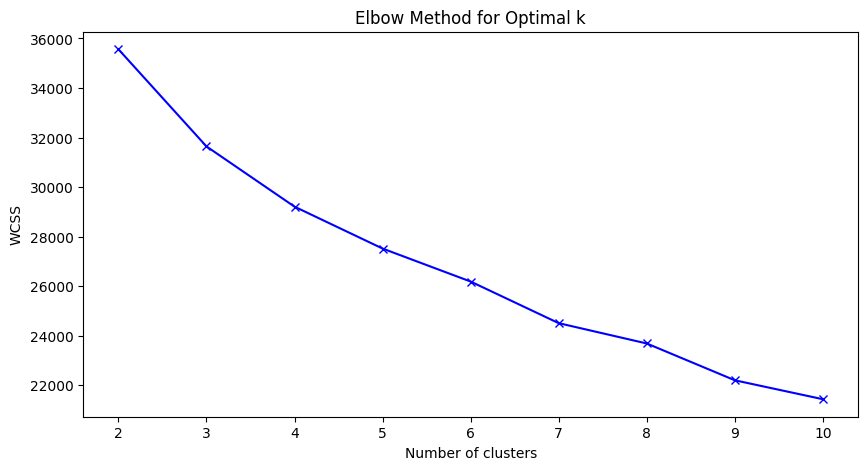

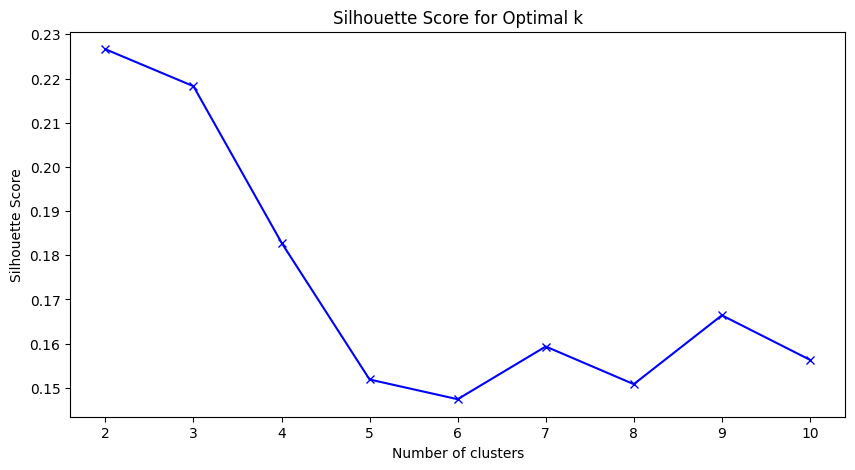

Optimal number of clusters for the housing data: 2


In [69]:
from sklearn.cluster import KMeans

# function to find optimal number of clusters
def optimal_kmeans_clusters(features):
    wcss = []
    silhouette_scores = []
    cluster_range = range(2, 11)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(features, kmeans.labels_))
    
    plt.figure(figsize=(10, 5))
    plt.plot(cluster_range, wcss, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(cluster_range, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal k')
    plt.show()

    optimal_k = cluster_range[np.argmax(silhouette_scores)]
    return optimal_k

# Determining the optimal number of clusters
optimal_k = optimal_kmeans_clusters(normalized_features)
print(f'Optimal number of clusters for the housing data: {optimal_k}')


### Gaussian Mixture Model (EM)

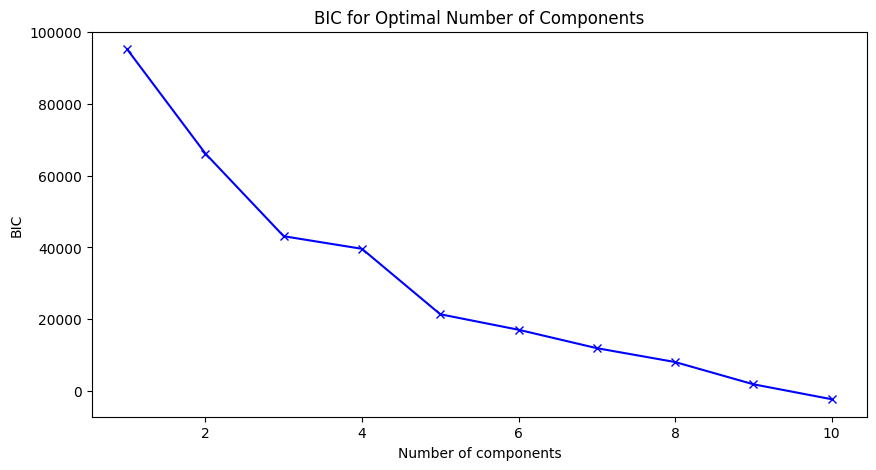

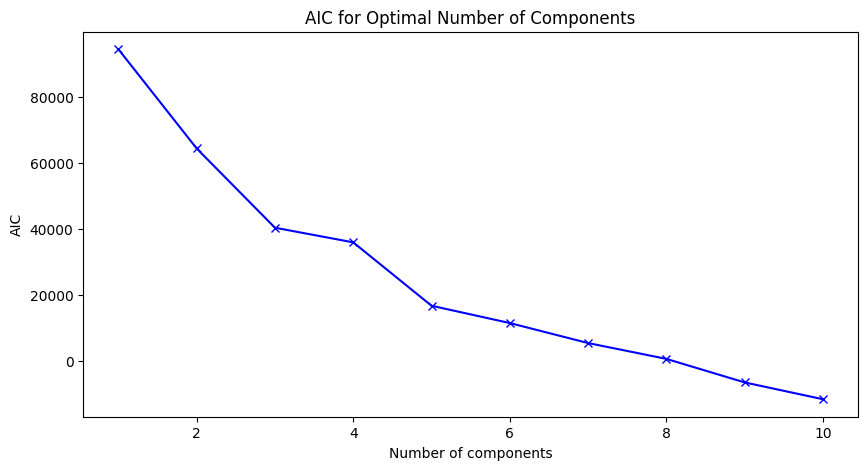

Optimal number of components for the housing data using AIC: 10
Optimal number of components for the housing data using BIC: 10


In [70]:
# find optimal components for GMM
def optimal_gmm_components(features):
    bic_scores = []
    aic_scores = []
    component_range = range(1, 11)
    for i in component_range:
        gmm = GaussianMixture(n_components=i, random_state=42)
        gmm.fit(features)
        bic_scores.append(gmm.bic(features))
        aic_scores.append(gmm.aic(features))

    plt.figure(figsize=(10, 5))
    plt.plot(component_range, bic_scores, 'bx-')
    plt.xlabel('Number of components')
    plt.ylabel('BIC')
    plt.title('BIC for Optimal Number of Components')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(component_range, aic_scores, 'bx-')
    plt.xlabel('Number of components')
    plt.ylabel('AIC')
    plt.title('AIC for Optimal Number of Components')
    plt.show()

    optimal_components_aic = component_range[np.argmin(aic_scores)]
    optimal_components_bic = component_range[np.argmin(bic_scores)]
    return optimal_components_aic, optimal_components_bic

# Determining the optimal number of components
optimal_components_aic, optimal_components_bic = optimal_gmm_components(normalized_features)
print(f'Optimal number of components for the housing data using AIC: {optimal_components_aic}')
print(f'Optimal number of components for the housing data using BIC: {optimal_components_bic}')

## Running Clustering Algorithms

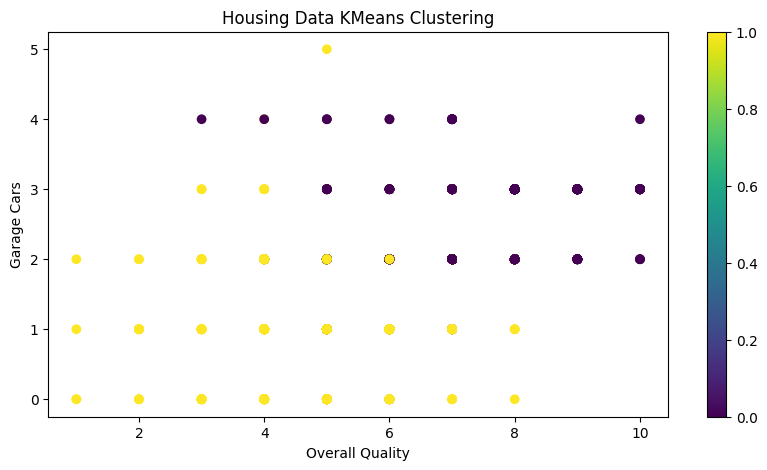

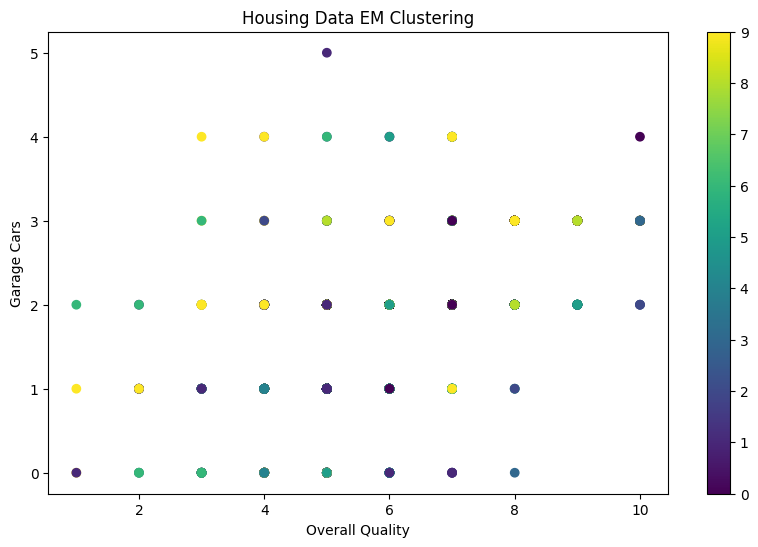

In [71]:
kmeans_housing = KMeans(n_clusters=optimal_k, random_state=42)
housing_kmeans_clusters = kmeans_housing.fit_predict(normalized_features)

# Add cluster labels to the original housing data
housing_data['KMeans_Cluster'] = housing_kmeans_clusters

# Plot kmeans clusters
plt.figure(figsize=(10, 5))
plt.scatter(housing_data['Overall Qual'], housing_data['Garage Cars'], c=housing_kmeans_clusters, cmap='viridis',marker='o')
plt.xlabel('Overall Quality')
plt.ylabel('Garage Cars')
plt.title('Housing Data KMeans Clustering')
plt.colorbar()
plt.show()

# Run GMM with optimal components
em_housing = GaussianMixture(n_components=optimal_components_bic, random_state=42)
housing_em_clusters = em_housing.fit_predict(normalized_features)

# add the cluster labels to the original housing data
housing_data['EM_Cluster'] = housing_em_clusters

# Plot EM clusters  
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['Overall Qual'], housing_data['Garage Cars'], c=housing_em_clusters, cmap='viridis',marker='o')
plt.xlabel('Overall Quality')
plt.ylabel('Garage Cars')
plt.title('Housing Data EM Clustering')
plt.colorbar()
plt.show()


## Performing Dimensionality Reduction Algorithms on Housing Dataset

#### Principal Component Analysis (PCA)

In [83]:
from sklearn.decomposition import PCA
# determine optimal number of components for PCA
def optimal_pca_components(features):
    pca = PCA()
    pca.fit(features)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('% Cumulative Explained Variance', color=color)
    ax1.bar(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, alpha=0.6, color=color, label='Cumulative Explained Variance')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('% Individual Explained Variance Ratio', color=color)
    ax2.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', color=color, label='Individual Explained Variance')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    fig.tight_layout()
    plt.title('Explained Variance (PCA)')
    plt.grid(True)
    plt.show()

    # Choose the number of components that explain a sufficient amount of variance
    n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
    pca = PCA(n_components=n_components)
    pca_transformed = pca.fit_transform(features)
    return pca_transformed, n_components



#### Independent Component Analysis (ICA)

In [80]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

# determine optimal number of components for ICA
def optimal_ica_components(features):
    ica = FastICA(random_state=42)
    kurtosis_scores = []
    component_range = range(2, 11)
    for i in component_range:
        ica.set_params(n_components=i)
        components = ica.fit_transform(features)
        kurtosis_scores.append(np.mean(np.abs(kurtosis(components, fisher=False))))

    plt.figure(figsize=(10, 6))
    plt.plot(component_range, kurtosis_scores, marker='o')
    plt.xlabel('Number of components')
    plt.ylabel('Average Kurtosis')
    plt.title('Average Kurtosis vs. Optimal Number of Components (ICA)')
    plt.show()

    optimal_components = component_range[np.argmax(kurtosis_scores)]
    ica = FastICA(n_components=optimal_components, random_state=42)
    ica_transformed = ica.fit_transform(features)
    return ica_transformed, optimal_components

#### Random Projection (RP)

In [84]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error

def apply_rp(features):
    reconstruction_errors = []
    component_range = range(2, 11)
    for n in component_range:
        rp = GaussianRandomProjection(n_components=n, random_state=42)
        projected = rp.fit_transform(features)
        reconstructed = np.dot(projected, np.linalg.pinv(rp.components_).T)
        error = mean_squared_error(features, reconstructed)
        reconstruction_errors.append(error)
    
    plt.figure(figsize=(10, 6))
    plt.plot(component_range, reconstruction_errors, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error')
    plt.title('Reconstruction Error vs. Number of Components (RP)')
    plt.grid(True)
    plt.show()
    
    # Choose the number of components that minimize reconstruction error
    n_components = component_range[np.argmin(reconstruction_errors)]
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    rp_transformed = rp.fit_transform(features)
    return rp_transformed, n_components

#### Apply PCA, ICA, RP to Housing Dataset

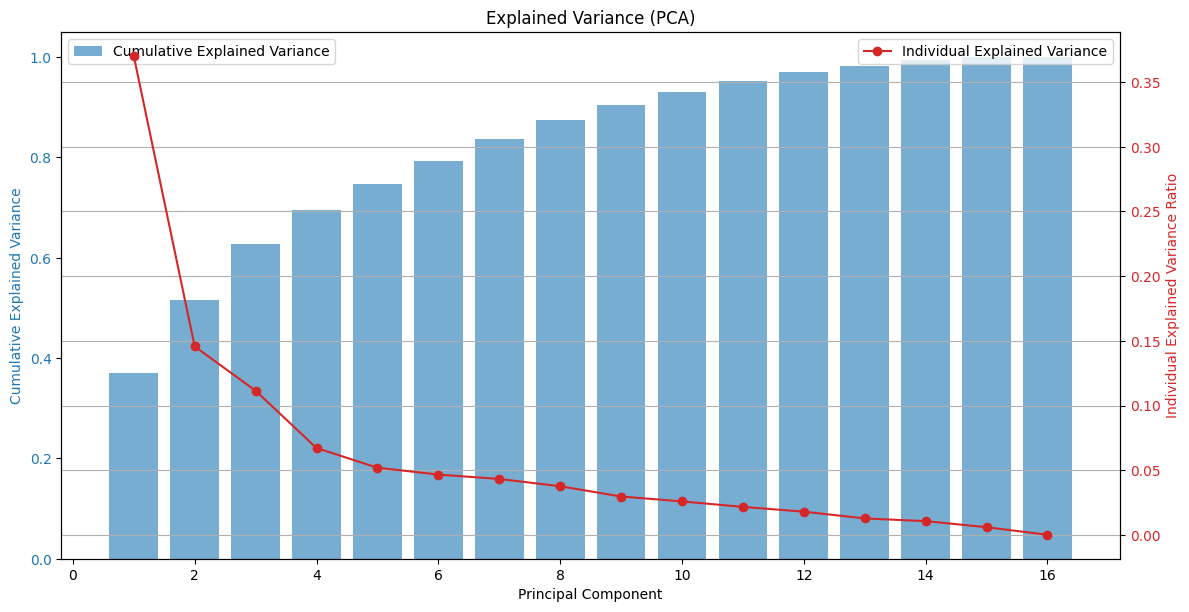

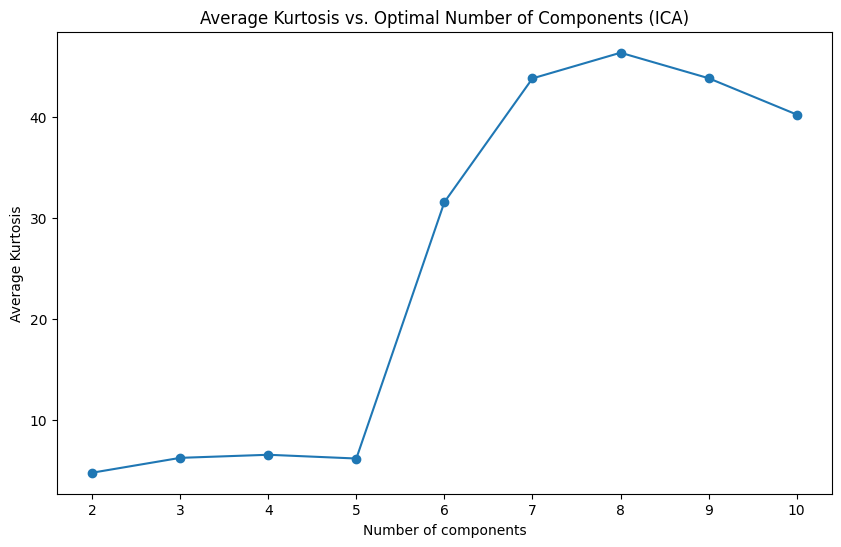

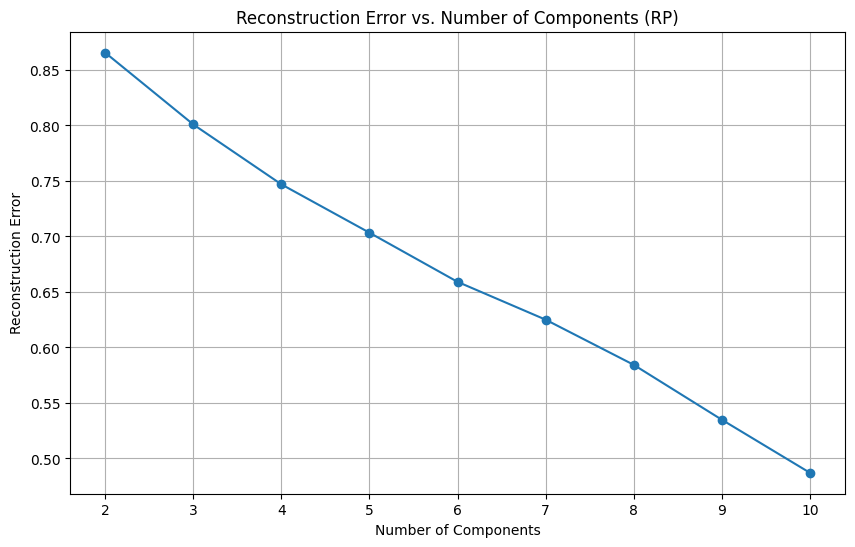

/var/folders/m3/r7hwf1fs777chjp132q4bwlh0000gp/T/ipykernel_85094/957474618.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_housing[:, 0], pca_housing[:, 1], cmap='viridis', marker='o')


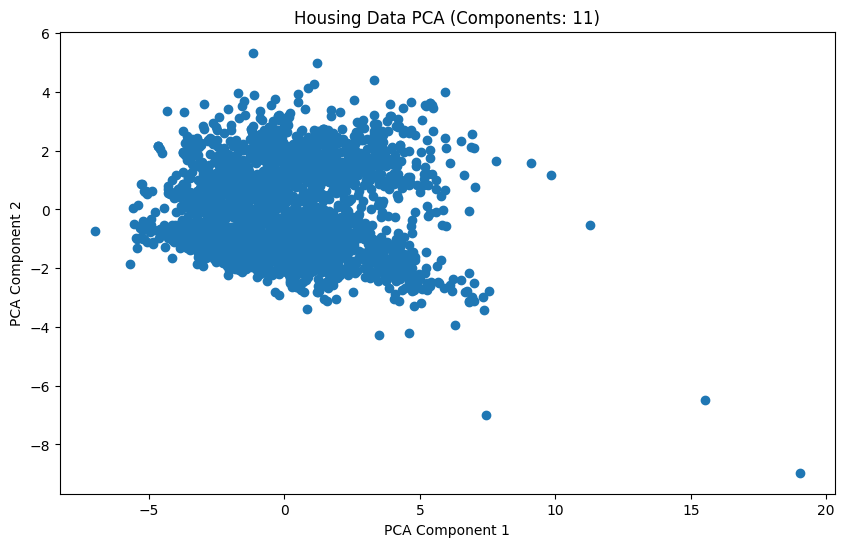

/var/folders/m3/r7hwf1fs777chjp132q4bwlh0000gp/T/ipykernel_85094/957474618.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(ica_housing[:, 0], ica_housing[:, 1], cmap='viridis', marker='o')


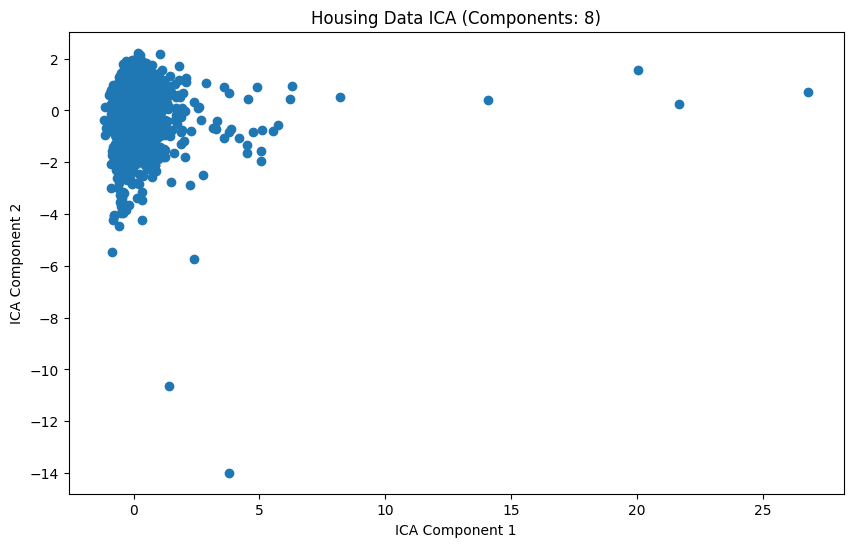

/var/folders/m3/r7hwf1fs777chjp132q4bwlh0000gp/T/ipykernel_85094/957474618.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(rp_housing[:, 0], rp_housing[:, 1], cmap='viridis', marker='o')


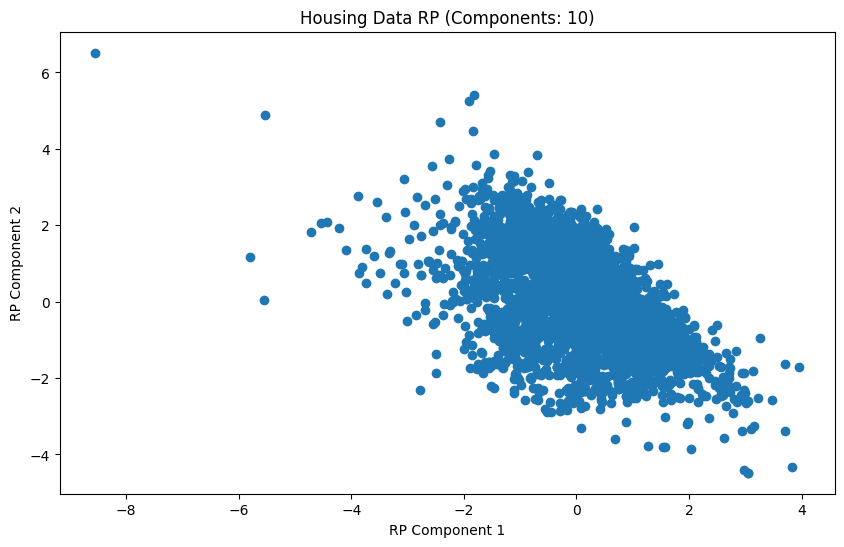

In [85]:
pca_housing, pca_components_housing = optimal_pca_components(normalized_features)
ica_housing, ica_components_housing = optimal_ica_components(normalized_features)
rp_housing, rp_components_housing = apply_rp(normalized_features)

# Plot PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_housing[:, 0], pca_housing[:, 1], cmap='viridis', marker='o')
plt.title(f'Housing Data PCA (Components: {pca_components_housing})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Plot ICA
plt.figure(figsize=(10, 6))
plt.scatter(ica_housing[:, 0], ica_housing[:, 1], cmap='viridis', marker='o')
plt.title(f'Housing Data ICA (Components: {ica_components_housing})')
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.show()

# Plot RP
plt.figure(figsize=(10, 6))
plt.scatter(rp_housing[:, 0], rp_housing[:, 1], cmap='viridis', marker='o')
plt.title(f'Housing Data RP (Components: {rp_components_housing})')
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 2')
plt.show()

## Reapplying Clustering Algorithms to Dimensionality Reduction Datasets

### Principal Component Analysis (PCA)

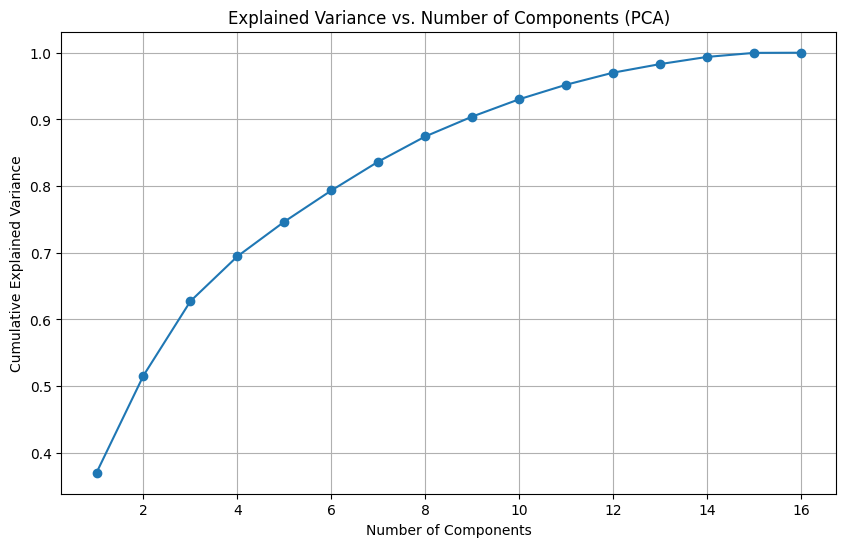

In [11]:
pca_housing, pca_components_housing = optimal_pca_components(normalized_features)


### Independent Component Analysis (ICA)

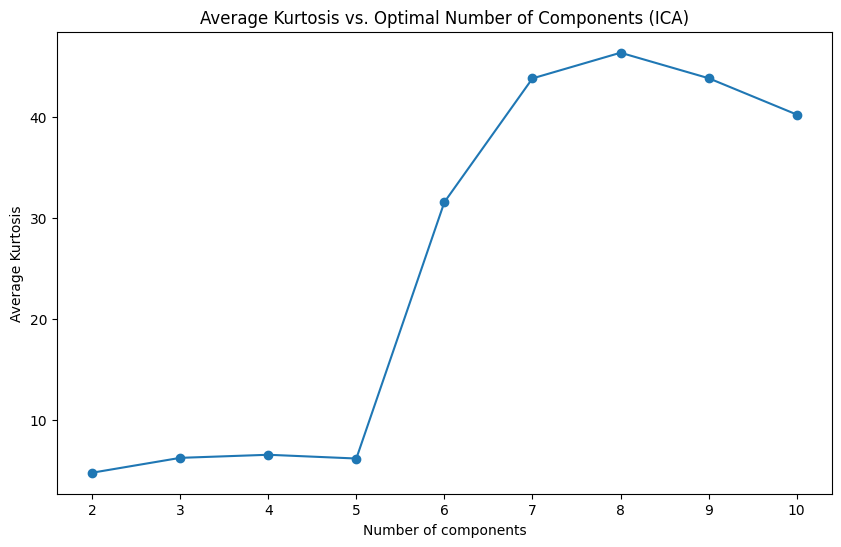

In [12]:
ica_housing, ica_components_housing = optimal_ica_components(normalized_features)

### Random Projection (RP)

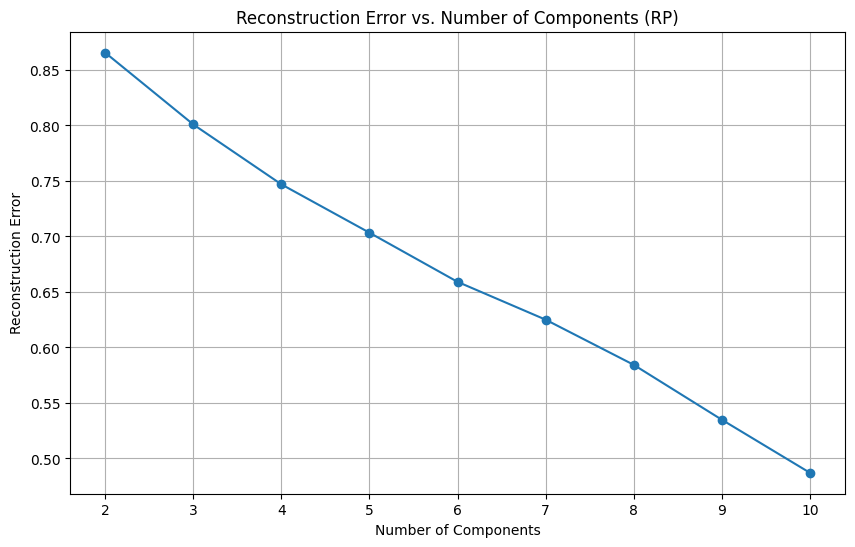

In [13]:
rp_housing, rp_components_housing = apply_rp(normalized_features)

### Clustering after Dimensionality Reduction

In [14]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def find_optimal_k_elbow(features):
    wcss = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()
    
    optimal_k = 3  # Assuming the elbow is at k=3 for simplicity
    return optimal_k

def find_optimal_k_silhouette(features):
    silhouette_scores = []
    k_range = range(2, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(features)
        silhouette_avg = silhouette_score(features, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal k')
    plt.grid(True)
    plt.show()
    
    optimal_k = k_range[np.argmax(silhouette_scores)]
    return optimal_k

def apply_kmeans(features, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)
    return clusters

def apply_em(features, n_components):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    clusters = gmm.fit_predict(features)
    return clusters

def evaluate_clustering(features, labels):
    silhouette_avg = silhouette_score(features, labels)
    davies_bouldin_avg = davies_bouldin_score(features, labels)
    calinski_harabasz_avg = calinski_harabasz_score(features, labels)
    return silhouette_avg, davies_bouldin_avg, calinski_harabasz_avg

def apply_and_evaluate_clustering(features, name):
    results = {}

    # Find optimal k
    optimal_k = find_optimal_k_silhouette(features)
    
    # Apply KMeans and EM
    kmeans_clusters = apply_kmeans(features, optimal_k)
    em_clusters = apply_em(features, optimal_k)

    # Evaluate KMeans
    silhouette_kmeans, davies_bouldin_kmeans, calinski_harabasz_kmeans = evaluate_clustering(features, kmeans_clusters)
    results[f'KMeans_{name}'] = (silhouette_kmeans, davies_bouldin_kmeans, calinski_harabasz_kmeans)

    # Evaluate EM
    silhouette_em, davies_bouldin_em, calinski_harabasz_em = evaluate_clustering(features, em_clusters)
    results[f'EM_{name}'] = (silhouette_em, davies_bouldin_em, calinski_harabasz_em)

    return results


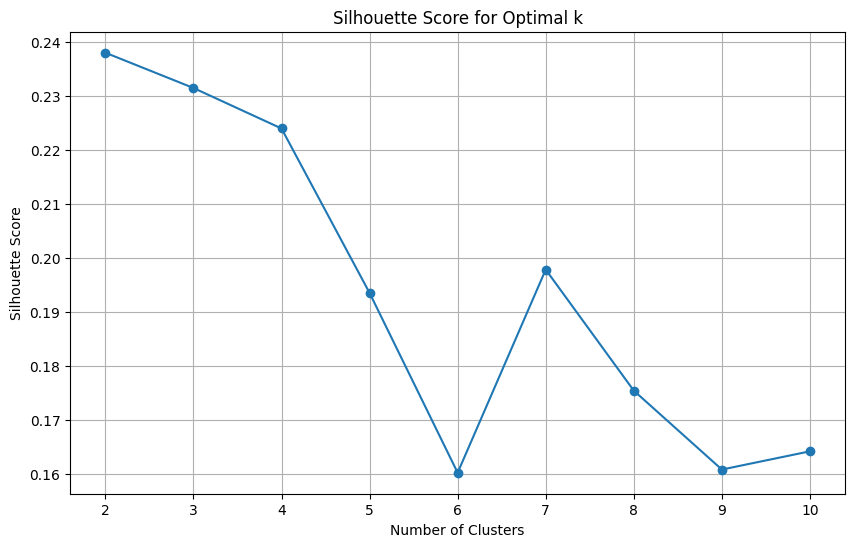

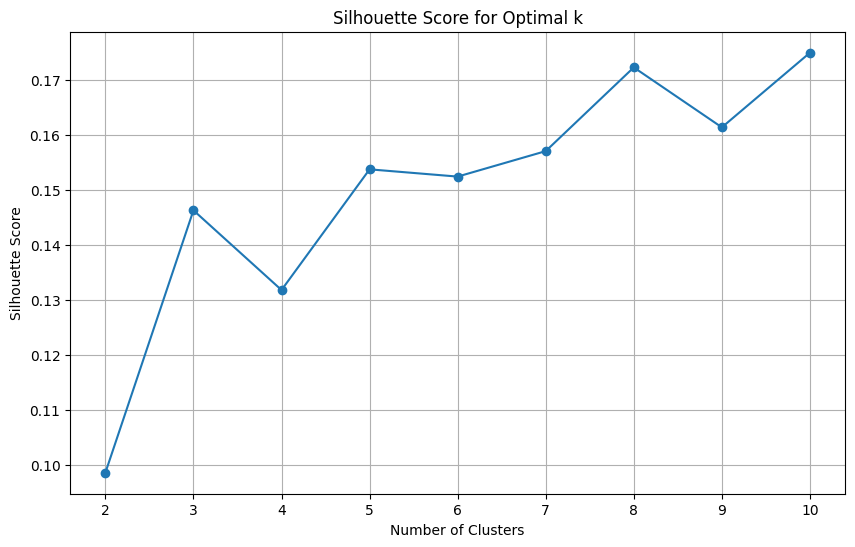

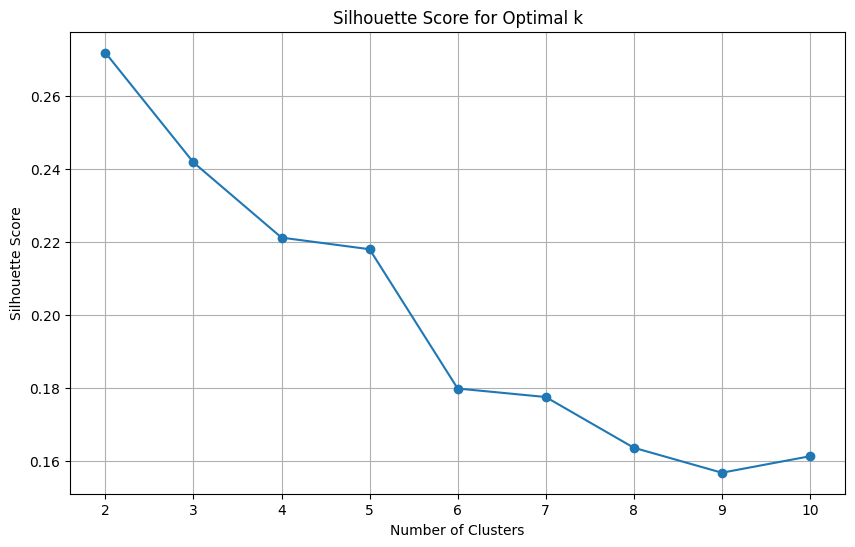

In [15]:
reduction_methods = {
    'PCA': pca_housing,
    'ICA': ica_housing,
    'RP': rp_housing
}

# Store and evaluate clustering results
all_results = {}
for name, features in reduction_methods.items():
    results = apply_and_evaluate_clustering(features, name)
    all_results.update(results)


### Plotting Performance Metrics

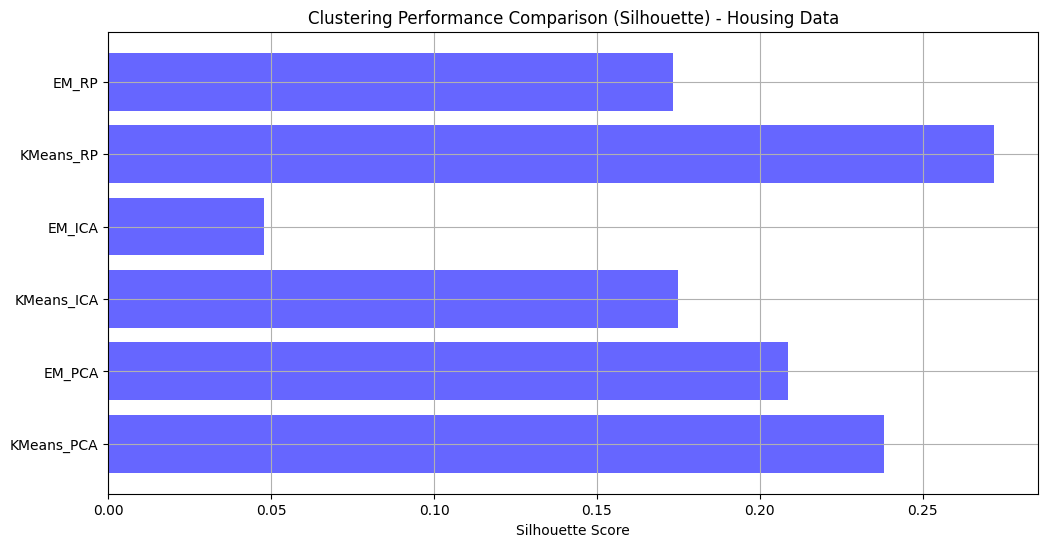

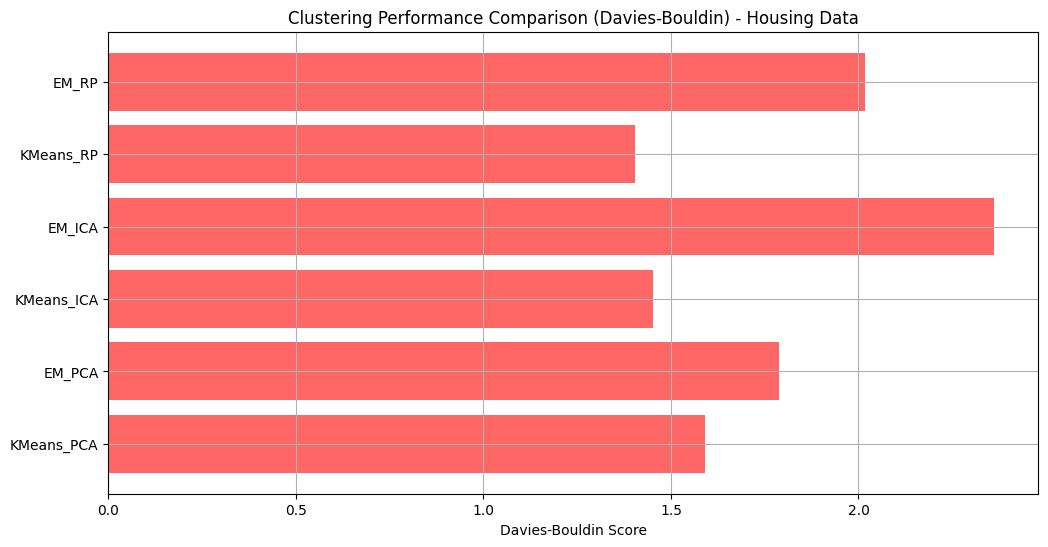

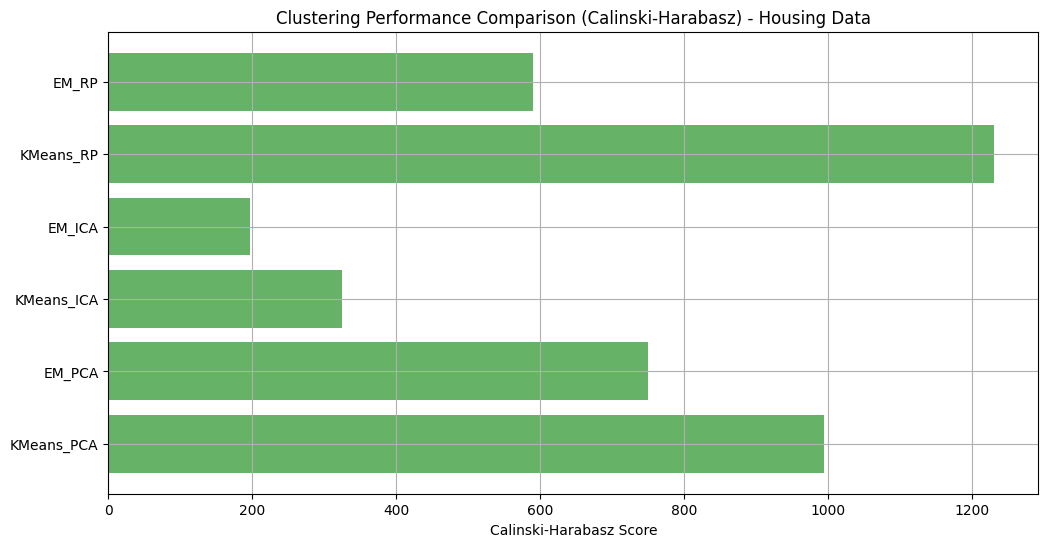

In [16]:
# Extract metric names and values
methods = list(all_results.keys())
silhouette_scores = [all_results[method][0] for method in methods]
davies_bouldin_scores = [all_results[method][1] for method in methods]
calinski_harabasz_scores = [all_results[method][2] for method in methods]

# Plot the results
plt.figure(figsize=(12, 6))
plt.barh(methods, silhouette_scores, color='b', alpha=0.6)
plt.xlabel('Silhouette Score')
plt.title('Clustering Performance Comparison (Silhouette) - Housing Data')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(methods, davies_bouldin_scores, color='r', alpha=0.6)
plt.xlabel('Davies-Bouldin Score')
plt.title('Clustering Performance Comparison (Davies-Bouldin) - Housing Data')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(methods, calinski_harabasz_scores, color='g', alpha=0.6)
plt.xlabel('Calinski-Harabasz Score')
plt.title('Clustering Performance Comparison (Calinski-Harabasz) - Housing Data')
plt.grid(True)
plt.show()


## Running Neural Network Learner on the Reduced Datasets

In [17]:
# load the housing dataset
housing_data = pd.read_csv('../data/housing/housing_data_cleaned.csv')
housing_features = housing_data.drop('SalePrice', axis=1)
y = housing_data['SalePrice']
median_price = y.median()
y = (y > median_price).astype(int)
# normalize the features
scaler = StandardScaler()
normalized_housing_features = scaler.fit_transform(housing_features)

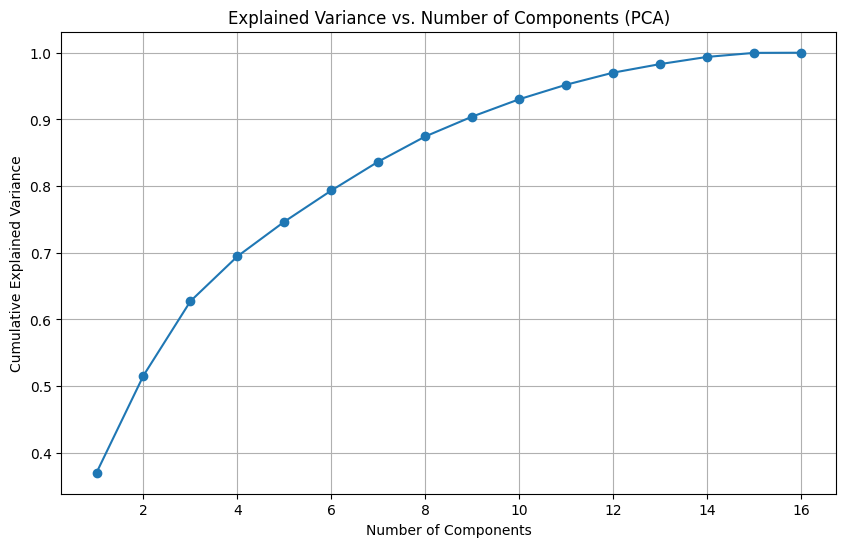

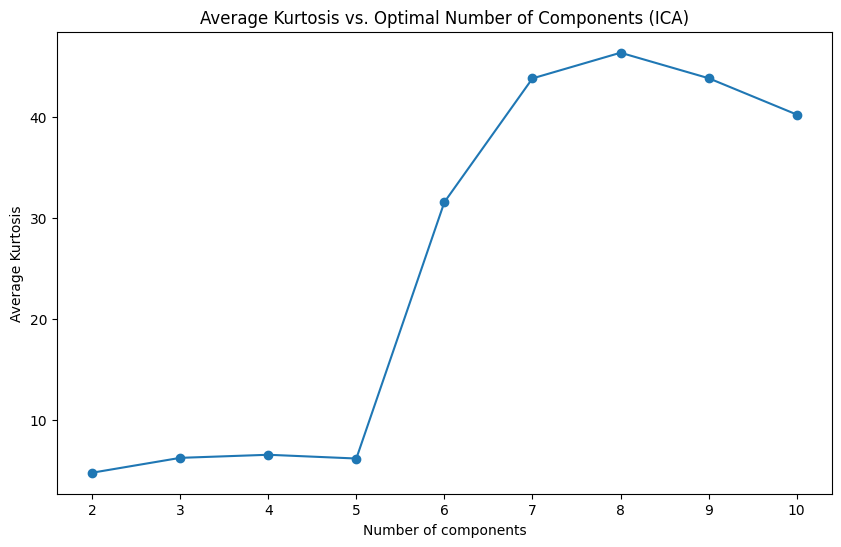

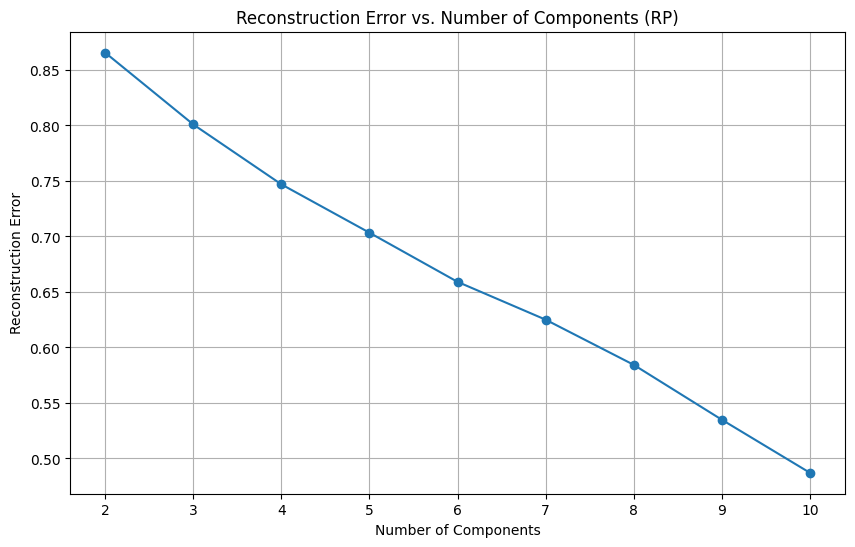

In [18]:
# Define functions for Dimensionality Reduction
pca_housing, pca_components_housing = optimal_pca_components(normalized_housing_features)
ica_housing, ica_components_housing = optimal_ica_components(normalized_housing_features)
rp_housing, rp_components_housing = apply_rp(normalized_housing_features)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define a function to build and evaluate the neural network model
def build_and_evaluate_nn(X, y, input_dim):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    nn_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, alpha=0.0001, random_state=42))
    ])
    
    start_time = time.time()
    nn_pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = nn_pipeline.predict(X_test)
    prediction_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report, training_time, prediction_time

# Train and evaluate on PCA-transformed data
accuracy_pca, report_pca, training_time_pca, prediction_time_pca = build_and_evaluate_nn(pca_housing, y, pca_components_housing)

# Train and evaluate on ICA-transformed data
accuracy_ica, report_ica, training_time_ica, prediction_time_ica = build_and_evaluate_nn(ica_housing, y, ica_components_housing)

# Train and evaluate on RP-transformed data
accuracy_rp, report_rp, training_time_rp, prediction_time_rp = build_and_evaluate_nn(rp_housing, y, rp_components_housing)

# Print the results
print("PCA - Accuracy: ", accuracy_pca)
print("Training Time: ", training_time_pca)
print("Prediction Time: ", prediction_time_pca)
print(report_pca)

print("ICA - Accuracy: ", accuracy_ica)
print("Training Time: ", training_time_ica)
print("Prediction Time: ", prediction_time_ica)
print(report_ica)

print("RP - Accuracy: ", accuracy_rp)
print("Training Time: ", training_time_rp)
print("Prediction Time: ", prediction_time_rp)
print(report_rp)


PCA - Accuracy:  0.9334470989761092
Training Time:  3.473477840423584
Prediction Time:  0.00038814544677734375
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       281
           1       0.93      0.95      0.94       305

    accuracy                           0.93       586
   macro avg       0.93      0.93      0.93       586
weighted avg       0.93      0.93      0.93       586

ICA - Accuracy:  0.947098976109215
Training Time:  2.4282188415527344
Prediction Time:  0.00032210350036621094
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       281
           1       0.94      0.96      0.95       305

    accuracy                           0.95       586
   macro avg       0.95      0.95      0.95       586
weighted avg       0.95      0.95      0.95       586

RP - Accuracy:  0.9180887372013652
Training Time:  2.172607183456421
Prediction Time:  0.0003459453582763672
              p

## Using Previously Generated Clusters as New Features and Evaluating Neural Network Model on Reduced Datasets

In [49]:
# Load and preprocess the housing dataset
housing_data = pd.read_csv('../data/housing/housing_data_cleaned.csv')
housing_data.fillna(housing_data.mean(), inplace=True)
housing_features = housing_data.drop(columns=['SalePrice'])  # Exclude the target variable

y = housing_data['SalePrice']  # Ensure y contains only the target variable
median_price = y.median()
y = (y > median_price).astype(int)
# normalize the features
scaler = StandardScaler()
normalized_housing_features = scaler.fit_transform(housing_features)

In [50]:
# Apply KMeans and EM Clustering to the original housing data
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_housing_features)

#Apply EM clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(normalized_housing_features)

In [51]:
# Adding the cluster labels to the original housing data
housing_features_with_clusters = np.hstack((normalized_housing_features, kmeans_labels.reshape(-1, 1), gmm_labels.reshape(-1, 1)))

In [52]:
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection

def apply_pca(features):
    pca = PCA()
    pca.fit(features)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    n_components = np.argmax(explained_variance >= 0.95) + 1
    pca = PCA(n_components=n_components)
    pca_transformed = pca.fit_transform(features)
    return pca_transformed, explained_variance, n_components

def apply_ica(features):
    ica = FastICA(random_state=42)
    kurtosis_values = []
    component_range = range(2, 11)
    for n in component_range:
        ica.set_params(n_components=n)
        components = ica.fit_transform(features)
        kurtosis_values.append(np.mean(np.abs(kurtosis(components, fisher=False))))
    
    n_components = component_range[np.argmax(kurtosis_values)]
    ica = FastICA(n_components=n_components, random_state=42)
    ica_transformed = ica.fit_transform(features)
    return ica_transformed, kurtosis_values, n_components

def apply_rp(features):
    reconstruction_errors = []
    component_range = range(2, 11)
    for n in component_range:
        rp = GaussianRandomProjection(n_components=n, random_state=42)
        projected = rp.fit_transform(features)
        reconstructed = np.dot(projected, np.linalg.pinv(rp.components_).T)
        error = mean_squared_error(features, reconstructed)
        reconstruction_errors.append(error)
    
    n_components = component_range[np.argmin(reconstruction_errors)]
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    rp_transformed = rp.fit_transform(features)
    return rp_transformed, reconstruction_errors, n_components

# Apply PCA, ICA, and RP to the new dataset with clusters
pca_with_clusters, explained_variance_with_clusters, pca_components_with_clusters = apply_pca(housing_features_with_clusters)
ica_with_clusters, kurtosis_values_with_clusters, ica_components_with_clusters = apply_ica(housing_features_with_clusters)
rp_with_clusters, reconstruction_errors_with_clusters, rp_components_with_clusters = apply_rp(housing_features_with_clusters)


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define a function to build and evaluate the neural network model
def build_and_evaluate_nn_with_clusters(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    nn_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, alpha=0.0001, random_state=42))
    ])
    
    start_time = time.time()
    nn_pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = nn_pipeline.predict(X_test)
    prediction_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report, training_time, prediction_time

# Train and evaluate on PCA-transformed data with clusters
accuracy_pca_with_clusters, report_pca_with_clusters, training_time_pca_with_clusters, prediction_time_pca_with_clusters = build_and_evaluate_nn_with_clusters(pca_with_clusters, y)

# Train and evaluate on ICA-transformed data with clusters
accuracy_ica_with_clusters, report_ica_with_clusters, training_time_ica_with_clusters, prediction_time_ica_with_clusters = build_and_evaluate_nn_with_clusters(ica_with_clusters, y)

# Train and evaluate on RP-transformed data with clusters
accuracy_rp_with_clusters, report_rp_with_clusters, training_time_rp_with_clusters, prediction_time_rp_with_clusters = build_and_evaluate_nn_with_clusters(rp_with_clusters, y)

# Print the results
print("PCA with Clusters - Accuracy: ", accuracy_pca_with_clusters)
print("Training Time: ", training_time_pca_with_clusters)
print("Prediction Time: ", prediction_time_pca_with_clusters)
print(report_pca_with_clusters)

print("ICA with Clusters - Accuracy: ", accuracy_ica_with_clusters)
print("Training Time: ", training_time_ica_with_clusters)
print("Prediction Time: ", prediction_time_ica_with_clusters)
print(report_ica_with_clusters)

print("RP with Clusters - Accuracy: ", accuracy_rp_with_clusters)
print("Training Time: ", training_time_rp_with_clusters)
print("Prediction Time: ", prediction_time_rp_with_clusters)
print(report_rp_with_clusters)


PCA with Clusters - Accuracy:  0.9453924914675768
Training Time:  3.6799585819244385
Prediction Time:  0.0003752708435058594
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       281
           1       0.95      0.95      0.95       305

    accuracy                           0.95       586
   macro avg       0.95      0.95      0.95       586
weighted avg       0.95      0.95      0.95       586

ICA with Clusters - Accuracy:  0.9368600682593856
Training Time:  3.555483102798462
Prediction Time:  0.0002911090850830078
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       281
           1       0.93      0.95      0.94       305

    accuracy                           0.94       586
   macro avg       0.94      0.94      0.94       586
weighted avg       0.94      0.94      0.94       586

RP with Clusters - Accuracy:  0.9300341296928327
Training Time:  2.154539108276367
Prediction Tim